<a href="https://colab.research.google.com/github/umar555-bit/Added-Customer-Churn-Prediction-Project/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Prediction using Machine Learning

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Model training and validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Save model
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

# Display first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Understanding & Cleaning

In [3]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Information about dataset
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Replace blank spaces with NaN
df = df.replace(" ", np.nan)

# Drop missing values
df = df.dropna()


Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

Exploratory Data Analysis (EDA)


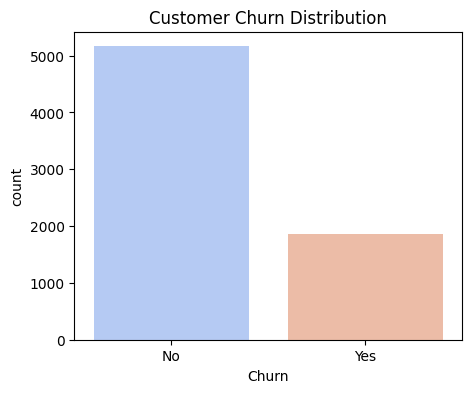

In [4]:
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.show()


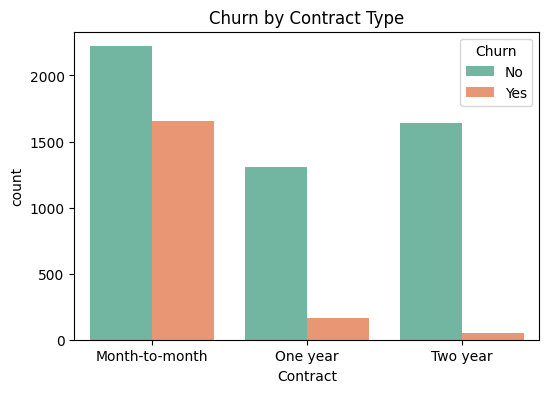

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Contract Type")
plt.show()


Month-to-Month contracts have the highest churn.

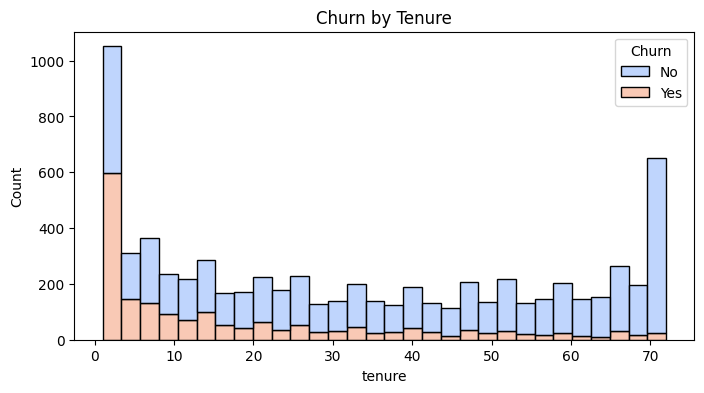

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30, palette="coolwarm")
plt.title("Churn by Tenure")
plt.show()


New customers (low tenure) are more likely to churn.

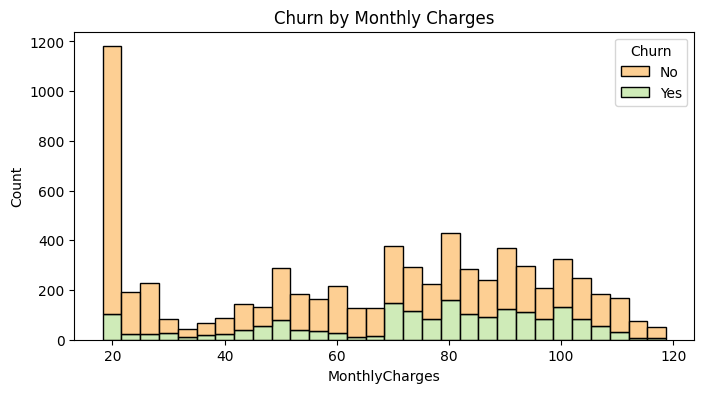

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", bins=30, palette="Spectral")
plt.title("Churn by Monthly Charges")
plt.show()


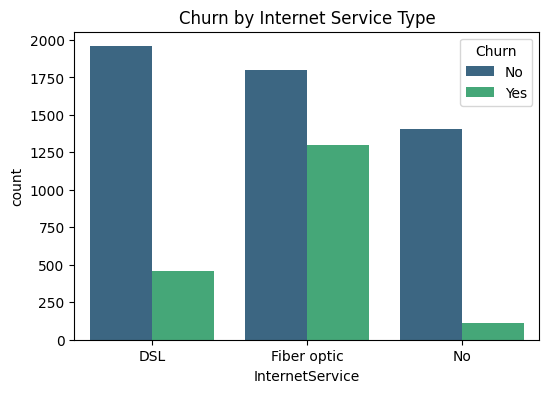

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="viridis")
plt.title("Churn by Internet Service Type")
plt.show()


Fiber optic customers churn more.

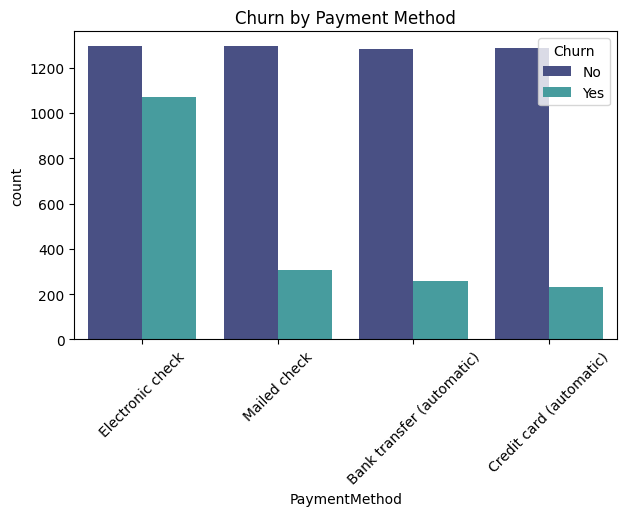

In [9]:
plt.figure(figsize=(7,4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="mako")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


Electronic check users churn the most.

**Data** Preprocessing

In [10]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

# Features & Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Handle imbalance with SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Converted categorical columns into numbers.

Balanced dataset using SMOTE.

Split into training (80%) & testing (20%).

Model Training & ***Evaluation***

In [11]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "Accuracy": acc,
        "Precision": clf_report["1"]["precision"],
        "Recall": clf_report["1"]["recall"],
        "F1-score": clf_report["1"]["f1-score"]
    }

# Compare results
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score
Decision Tree,0.778800,0.764220,0.806389,0.784739
Random Forest,0.847047,0.833488,0.867377,0.850095
XGBoost,0.837851,0.830492,0.848984,0.839636


Trained Decision Tree, Random Forest, and XGBoost.

Compared accuracy, precision, recall, F1-score.

Usually, Random Forest/XGBoost performs best.

Confusion Matrix & **Report**

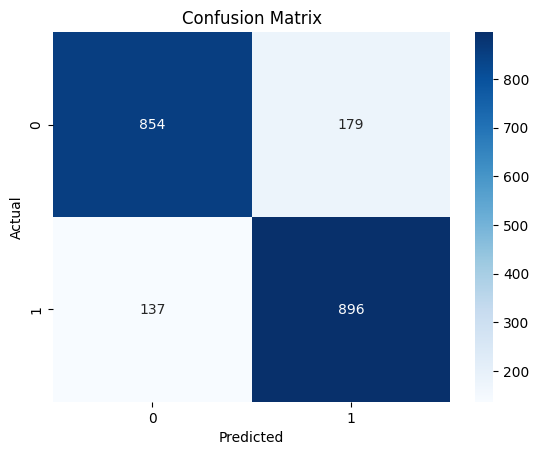

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.83      0.87      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [12]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Saving the Model

In [13]:
# Save best model
with open("churn_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved successfully!")


✅ Model saved successfully!


 **Business Insights & Conclusion**

Month-to-Month contracts have highest churn.

Low tenure customers are more likely to leave.

High monthly charges increase churn risk.

Electronic check users churn more than auto-pay customers.

Best performing model → Random Forest/XGBoost with good recall for churn class.